In [1]:
import pandas as pd
import numpy as np
from nlp import preprocessing as pp

In [2]:
vocab_dict = pp.get_cefr_word_dictionary()
adv_vocab_dict = pp.get_cefr_word_dictionary_adv()

In [3]:
cefr_data = pd.read_csv('data/cefr_readings.csv')

In [4]:
cefr_avg_word = pp.get_avg_word_length(cefr_data, 'documents')
cefr_data['avg_word_len'] = cefr_avg_word

In [5]:
cefr_levels_df = pp.get_word_level_dataframe(cefr_data, 'documents', vocab_dict, adv_vocab_dict)

In [6]:
cefr_pos_df = pp.get_part_of_speech_dataframe(cefr_data, 'documents')

drop_pos = []
for row in pd.DataFrame(cefr_pos_df.sum()).iterrows():
    if row[1][0] < 100:
        drop_pos.append(row[0])
drop_pos

cefr_pos_df.drop(drop_pos, axis=1, inplace=True)

In [7]:
cefr_df = pp.get_full_dataframe(cefr_data, 'documents', 'cefr_level', cefr_levels_df, cefr_pos_df)

c:\Users\ravis\Desktop\PersonifiedScriptWriter\phase-1-cerf\nlp\preprocessing.py:126: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_words = df_1.groupby('doc_id').sum()


In [8]:
cefr_df

,documents,cefr_level,avg_word_len,num_of_words,A1,A2,B1,B2,C1,C2,...,VBN,RBS,RBR,MD,RP,JJR,POS,PDT,EX,WDT
0,The Long Night This is David Reilly's first bo...,A2,4.21,187,137,14,9,1,1,0,...,1,1,1,1,0,0,0,0,0,0
1,Most house burglaries happen between 2 p.m. an...,A2,4.47,191,147,13,11,11,0,0,...,4,0,0,3,2,1,1,0,0,0
2,One very famous place for tourists in London i...,A2,4.59,112,68,19,6,3,0,0,...,5,0,0,2,0,0,0,0,0,0
3,To: All staff Subject: Holidays From: D Brown ...,A2,4.13,105,76,9,8,3,0,0,...,0,0,0,4,0,0,0,0,0,0
4,Canada Geese are large blue and white birds. W...,A2,4.30,194,150,13,18,2,0,0,...,2,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,4.73,757,505,87,72,36,1,11,...,25,0,1,9,6,0,1,2,2,0
327,"A course at the Bamboo Bike Club, run by engin...",C2,4.84,865,521,86,65,76,3,5,...,16,1,3,5,5,2,2,3,0,4
328,The two sisters kept Lily's driving a secret f...,C2,4.49,928,602,93,91,51,4,8,...,27,1,0,13,4,1,3,1,2,7
329,I have never begun a novel with more misgiving...,C2,4.18,775,591,82,64,21,4,5,...,30,0,2,24,1,2,0,1,1,6


In [9]:
cefr_df.dtypes

documents        object
cefr_level       object
avg_word_len    float64
num_of_words      int64
A1                int64
A2                int64
B1                int64
B2                int64
C1                int64
C2                int64
DT                int64
NNP               int64
VBZ               int64
RB                int64
VBD               int64
NN                int64
IN                int64
VBG               int64
JJ                int64
NNS               int64
WRB               int64
PRP               int64
CD                int64
TO                int64
VB                int64
JJS               int64
VBP               int64
CC                int64
:                 int64
WP                int64
PRP$              int64
VBN               int64
RBS               int64
RBR               int64
MD                int64
RP                int64
JJR               int64
POS               int64
PDT               int64
EX                int64
WDT               int64
dtype: object

In [21]:
cefr_drop = ['documents','cefr_level']
cefr_documents = cefr_df.drop(cefr_drop, axis=1)
cefr_target = cefr_df['cefr_level']
from sklearn.model_selection import train_test_split

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, LSTM, Reshape, Embedding, TextVectorization,Bidirectional,concatenate,Flatten

In [34]:
label_mapping = {'A2': 0, 'B1': 1, 'B2': 2,'C1':3,'C2':4}
y_train_encoded = np.array([label_mapping[label] for label in cefr_target])

# Convert integer labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train_encoded)

In [35]:
X_train, X_test, y_train_categorical, y_test = train_test_split(cefr_documents, y_train_categorical, test_size=0.2, random_state=42,stratify=y_train_categorical)

In [36]:
X_train.shape

(264, 39)

In [37]:
y_train_categorical.shape

(264, 5)

In [80]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(512, return_sequences=True)),
    Bidirectional(LSTM(1024)),
    Dense(2048, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(5, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    history=model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_split=0.3,
                        callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0001,verbose=1)])

Epoch 1/100
6/6 [==============================] - 19s 939ms/step - loss: 1.6450 - accuracy: 0.2826 - val_loss: 6.7320 - val_accuracy: 0.1875
Epoch 2/100
6/6 [==============================] - 1s 91ms/step - loss: 2.3976 - accuracy: 0.2717 - val_loss: 1.3296 - val_accuracy: 0.2875
Epoch 3/100
6/6 [==============================] - 1s 91ms/step - loss: 1.2622 - accuracy: 0.3533 - val_loss: 1.1849 - val_accuracy: 0.3375
Epoch 4/100
6/6 [==============================] - 1s 91ms/step - loss: 1.1797 - accuracy: 0.4076 - val_loss: 1.0497 - val_accuracy: 0.4500
Epoch 5/100
6/6 [==============================] - 1s 93ms/step - loss: 1.1108 - accuracy: 0.4402 - val_loss: 1.0356 - val_accuracy: 0.4625
Epoch 6/100
6/6 [==============================] - 1s 91ms/step - loss: 0.9794 - accuracy: 0.5054 - val_loss: 1.0672 - val_accuracy: 0.4500
Epoch 7/100
6/6 [==============================] - 1s 91ms/step - loss: 0.9489 - accuracy: 0.5489 - val_loss: 0.9740 - val_accuracy: 0.5875
Epoch 8/100
6/6 [=

In [81]:
_, train_acc = model.evaluate(X_train, y_train_categorical, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3/3 [==============================] - 0s 32ms/step - loss: 0.6633 - accuracy: 0.6567
Train: 0.667, Test: 0.657


In [82]:
accr = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 0s 63ms/step - loss: 0.6633 - accuracy: 0.6567
Test set
  Loss: 0.663
  Accuracy: 0.657


In [83]:
from matplotlib import pyplot as plt

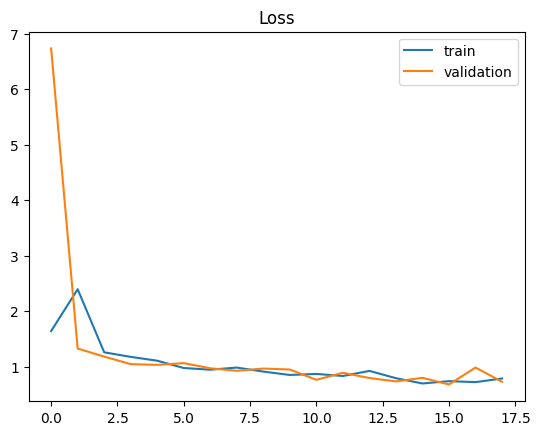

In [84]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

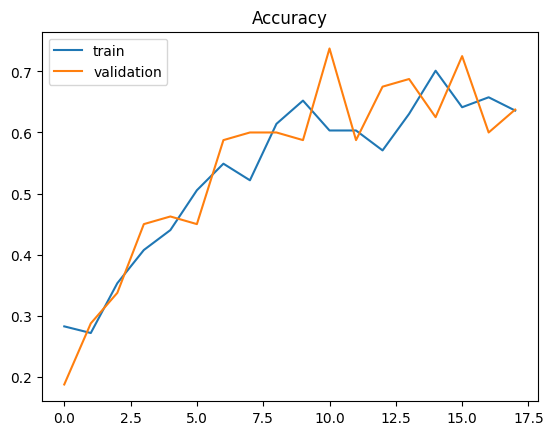

In [85]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()